In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Importing Data:
from google.colab import files
uploaded = files.upload()

Saving ds3021_dataset.csv to ds3021_dataset.csv


In [5]:
df = pd.read_csv('ds3021_dataset.csv')

In [10]:
df.head() # look at the first 5 rows of the data to see the columns and entry formats

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [7]:
df.tail()

,Location,Region,Subregion,Rate,Count,Year
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015
194,Zimbabwe,Africa,Eastern Africa,7.5,981,2012


In [8]:
df.shape #output is in format: (rows, columns)

(195, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


I particularly want to look at the trends over time for homicide count as a whole in the world, and I also want to look at regional and subregional homicide count distributions to see if there are patterns or areas that consistently have a lot of / almost no homocides.

In [13]:
# wrangling / cleaning (minimal, since this is a kaggle dataset):
print(df.isnull().sum()) # this checks all the entries for null values and gives us the number of null values in each column separately
print("\n")
print(df.dtypes) # this is so we know if we need to convert the types of any variable

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64


Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object


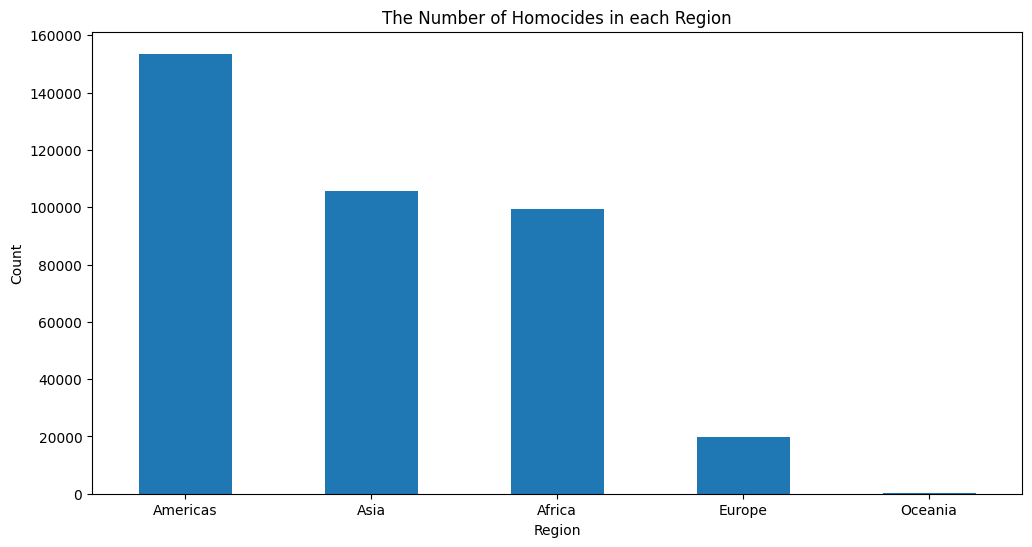

In [91]:
df_region_count = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
# here i reorder the regions in descending order based on its count so that it makes more sense when we graph it

plt.figure(figsize = (12,6))
df_region_count.plot(kind = 'bar', rot = 360) # not sure why it's rot = 360 and not rot = 90 or 270 # trial and error works for now
# but I wanted to make the x labels horizontal and readable instead of its default sideways

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('The Number of Homocides in each Region')
plt.show()

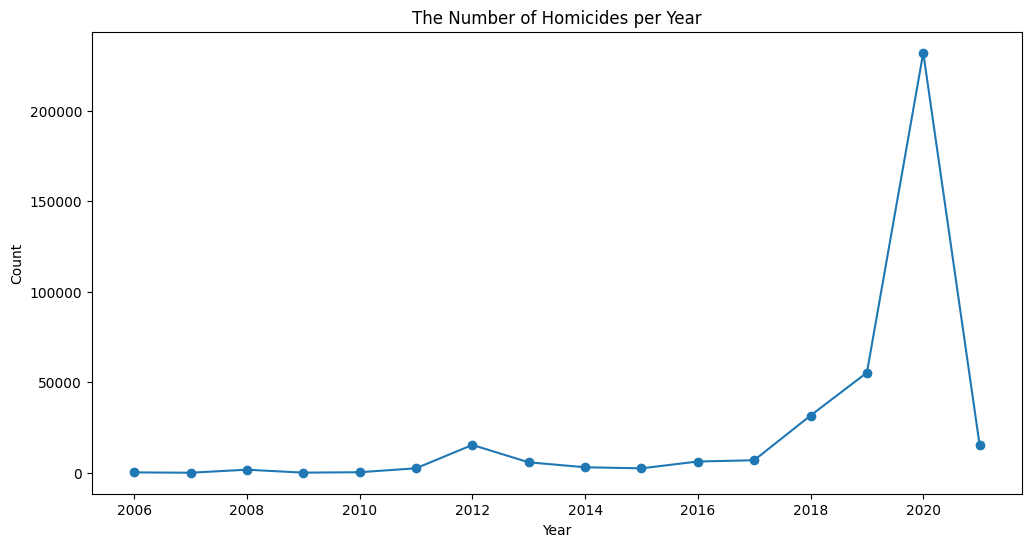

In [92]:
df_year_count = df.groupby('Year')['Count'].sum()  # this is to count up the number of homicides in a given year

plt.figure(figsize = (12,6))
df_year_count.plot(kind = 'line', marker = 'o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('The Number of Homicides per Year')
plt.show()

The huge spike in 2020 is really interesting -- it coincidentally falls within the same period as when COVID-19 was at its most deadly. Might covid deaths have been mistaken as homicide deaths? That seems unlikely. I'm going to analyze the number of homicides per year with relation to regions with a heat map so I can see the separate counts better.

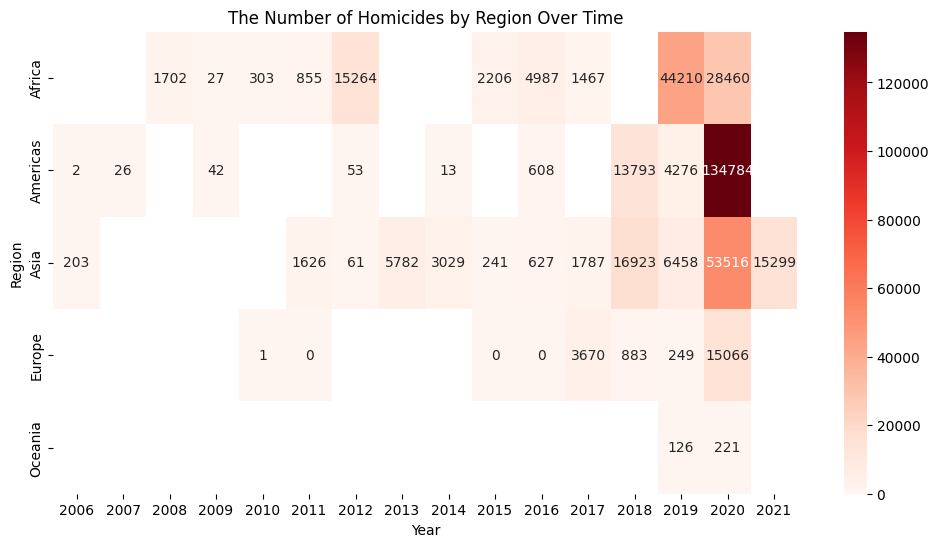

In [93]:
df_year_region = df.groupby(['Year', 'Region'])['Count'].sum().reset_index()

plt.figure(figsize=(12,6))

df_pivot = df_year_region.pivot(index='Region', columns='Year', values='Count')
# this is to reshape the dataframe so that it can fit the heatmap structure
# had to look this up; I haven't really worked with heatmap plotting a lot before

sns.heatmap(df_pivot, cmap='Reds', annot=True, fmt='g')

plt.xlabel('Year')
plt.ylabel('Region')
plt.title('The Number of Homicides by Region Over Time')
plt.show()

It seems like Europe, Asia, and the Americas all had comparable, significant increases in the number of homocides in 2020. I'm going to zoom into the Americas and separate the sub-regions to see if there are any trends there.

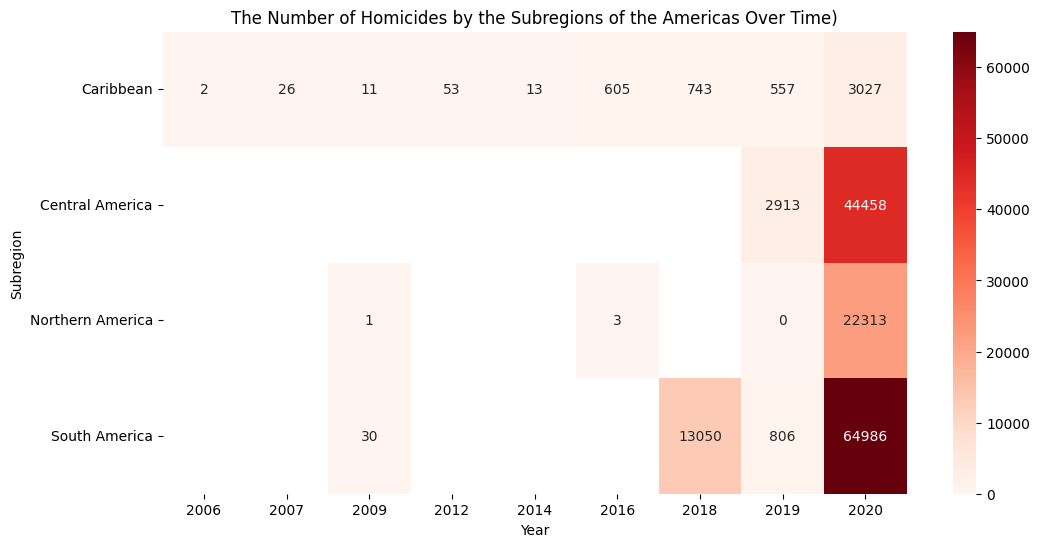

In [94]:
df_americas = df[df['Region'] == 'Americas'] # this is a new dataframe that only has the rows that have 'Americas' in the Region column

df_americas_grouped = df_americas.groupby(['Subregion', 'Year'])['Count'].sum().reset_index()
# this is to make sure there are no duplicate entries of the same subregion-year combination
# before I added this line, it told me it couldn't pivot because 'Index contains duplicate entries, cannot reshape'

plt.figure(figsize=(12,6))
df_americas_pivot = df_americas_grouped.pivot(index='Subregion', columns='Year', values='Count')

sns.heatmap(df_americas_pivot, cmap='Reds', annot=True, fmt='g')

plt.xlabel('Year')
plt.ylabel('Subregion')
plt.title('The Number of Homicides by the Subregions of the Americas Over Time)')
# plt.xticks(rotation=45)
plt.show()

We can see that South America has a HUGE increase in homocides in 2020. Another issue I can see is that Northern America had 0 homocides in 2019, which... isn't the case. I guess they weren't able to record sufficient data for this dataset, but I'm not sure if all the regions/subregion entries were similarly reduced or if it was just Northern America where they didn't get enough data.

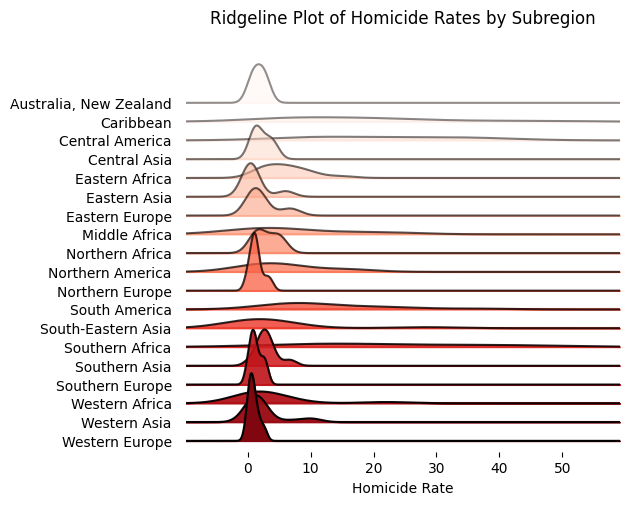

In [97]:
import joypy
from matplotlib import cm

joypy.joyplot(data=df, by='Subregion', column='Rate', colormap=cm.Reds, fade=True)
plt.title('Ridgeline Plot of Homicide Rates by Subregion')
plt.xlabel('Homicide Rate')
plt.ylabel('Subregion')
plt.show() # we recently learned about creating ridgeline plots in our data design class!

<ipython-input-104-01e46ef435cf>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_country_sorted = df.groupby('Year').apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True) # find country with most homocides per year


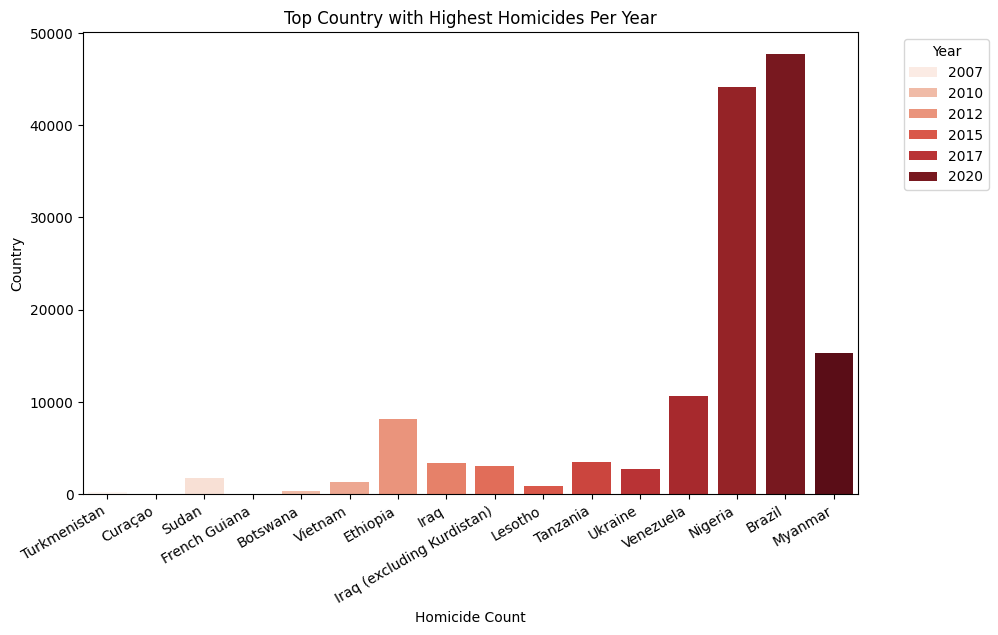

In [104]:
plt.figure(figsize=(10,6))
df_top_country_sorted = df.groupby('Year').apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True) # find country with most homocides per year

sns.barplot(data=df_top_country_sorted, y='Count', x='Location', hue='Year', palette="Reds") # this is a bar chart in the style of a heatmap, if that makes sense

plt.title('Top Country with Highest Homicides Per Year')
plt.xlabel('Homicide Count')
plt.ylabel('Country')
plt.xticks(rotation=30, ha='right')
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

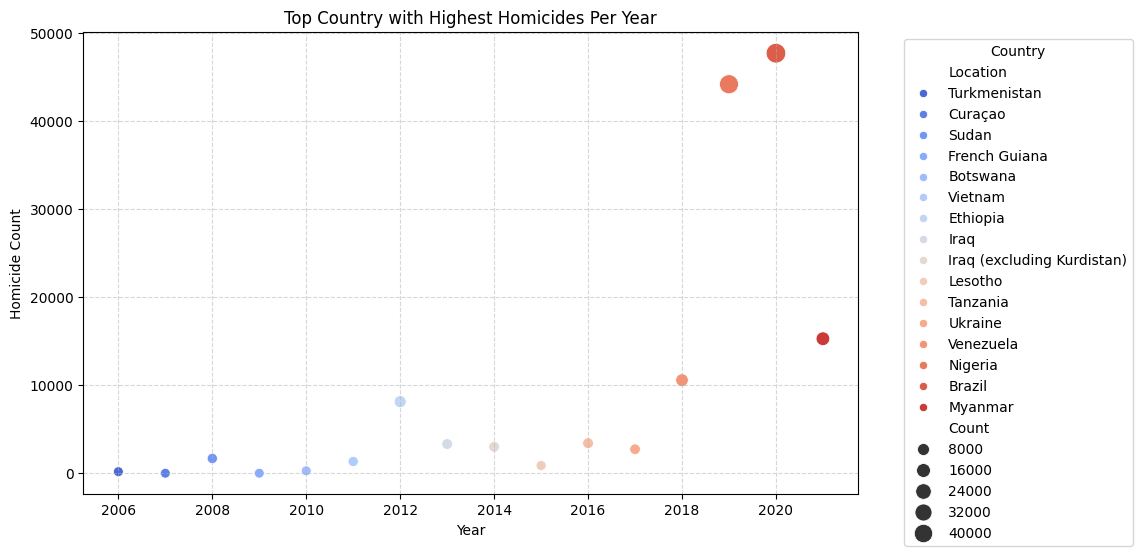

In [99]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df_top_country_sorted, x='Year', y='Count', hue='Location', size='Count', sizes=(50,200), palette='coolwarm')
# now I'm going to do a dot plot of the same data graphed as above in the bar plot just so the graph can look simpler

plt.title('Top Country with Highest Homicides Per Year')
plt.xlabel('Year')
plt.ylabel('Homicide Count')

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()